In [12]:
# Imports
import os
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns

from nltk import word_tokenize, download
from nltk.stem import SnowballStemmer
download('punkt')

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import joblib #para exportar el modelo
import pickle

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\javia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [13]:
# Creamos el array de textos y el array de categorias
x=[]
y=[]

In [14]:
# Cargamos el dataset
for cat in os.listdir('../newspaper-articles-main/'):
    for txt in os.listdir('../newspaper-articles-main/'+cat+'/'):
        with open ('../newspaper-articles-main/'+cat+'/'+txt, encoding = 'utf8') as f:
            x.append(f.read())
            y.append(cat)

In [15]:
# Mostramos el array de textos
x

a de ocho minutos para la conclusión permitió al Werder Bremen rescatar un empate (1-1) en casa ante el Colonia, en un gris encuentro en el que ni locales, ni visitantes lograron generar claras ocasiones de gol.De hecho, lo más destacado de la primera mitad fue la sustitución del portero del Colonia Timo Horn, que tuvo que abandonar el terreno de juego a los cuarenta minutos por lesión.Una dinámica que parecía abocar a ambos conjuntos a un empate sin goles, que no servía ni al Werder Bremen para alcanzar los puestos europeos, ni al Colonia para escapar de la parte baja de la clasificación.UNIÓN BERLÍN, 5 - BIELEFELD, 0El Union Berlín, por su parte, refrendó la buena temporada que viene haciendo con una goleada por 5-0 ante el Arminia Bielefeld.La figura del partido fue el exinternacional Max Kruse, que llegó por sorpresa al Union al comienzo de la temporada cuando muchos lo veían en un equipo de más envergadura.BORUSSIA DORTMUND, 2 - BAYERN MUNICH, 3El Bayern Múnich derrotó hoy por 2-3

In [16]:
y

['Despoblacion',
 'Despoblacion',
 'Despoblacion',
 'Despoblacion',
 'Despoblacion',
 'Despoblacion',
 'Despoblacion',
 'Despoblacion',
 'Despoblacion',
 'Despoblacion',
 'Despoblacion',
 'Despoblacion',
 'Despoblacion',
 'Despoblacion',
 'Despoblacion',
 'No Despoblacion',
 'No Despoblacion',
 'No Despoblacion',
 'No Despoblacion',
 'No Despoblacion',
 'No Despoblacion',
 'No Despoblacion',
 'No Despoblacion',
 'No Despoblacion',
 'No Despoblacion',
 'No Despoblacion',
 'No Despoblacion',
 'No Despoblacion',
 'No Despoblacion',
 'No Despoblacion']

In [17]:
# Pasamos el array de categorias a valores numericos
y_num=[]
value_des = 0
value_nodes = 0
for i in y:
    if i == 'Despoblacion':
        value_des+=1
        y_num.append(0)
    else:
        y_num.append(1)
        value_nodes+=1

In [18]:
# Mostramos el array de categorias por numero
y_num

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

<BarContainer object of 2 artists>

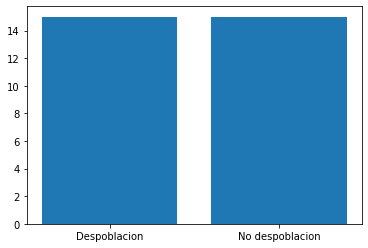

In [19]:
# Mostramos numero de textos por categoria
names = ['Despoblacion', 'No despoblacion']
values = [value_des, value_nodes]
plt.bar(names, values)

In [20]:
# Proceso de limpieza del array de textos
spanish_stemmer = SnowballStemmer('spanish')
corpus = []
for texto in x:
    clean_text = re.sub("[%s]" % re.escape(string.punctuation), " ", texto)
    clean_text= clean_text.lower()
    clean_text = re.sub('\w*\d\w*', ' ', clean_text)
    tokenized = word_tokenize(clean_text)
    for j in range(len(tokenized)):
        tokenized[j]=format(spanish_stemmer.stem(tokenized[j]))
    stemmed = ' '.join(tokenized)
    corpus.append(stemmed)

In [21]:
# Cargamos el texto de stop words en castellano, lo mostramos
with open('../stopword.txt', 'r') as file:
    my_stopwords=[file.read().replace('\n', ',')]
print(my_stopwords)

['0,1,2,3,4,5,6,7,8,9,_,a,actualmente,acuerdo,adelante,ademas,ademÃƒÂ¡s,adrede,afirmÃƒÂ³,agregÃƒÂ³,ahi,ahora,ahÃƒÂ\xad,al,algo,alguna,algunas,alguno,algunos,algÃƒÂºn,alli,allÃƒÂ\xad,alrededor,ambos,ampleamos,antano,antaÃƒÂ±o,ante,anterior,antes,apenas,aproximadamente,aquel,aquella,aquellas,aquello,aquellos,aqui,aquÃƒÂ©l,aquÃƒÂ©lla,aquÃƒÂ©llas,aquÃƒÂ©llos,aquÃƒÂ\xad,arriba,arribaabajo,asegurÃƒÂ³,asi,asÃƒÂ\xad,atras,aun,aunque,ayer,aÃƒÂ±adiÃƒÂ³,aÃƒÂºn,b,bajo,bastante,bien,breve,buen,buena,buenas,bueno,buenos,c,cada,casi,cerca,cierta,ciertas,cierto,ciertos,cinco,claro,comentÃƒÂ³,como,con,conmigo,conocer,conseguimos,conseguir,considera,considerÃƒÂ³,consigo,consigue,consiguen,consigues,contigo,contra,cosas,creo,cual,cuales,cualquier,cuando,cuanta,cuantas,cuanto,cuantos,cuatro,cuenta,cuÃƒÂ¡l,cuÃƒÂ¡les,cuÃƒÂ¡ndo,cuÃƒÂ¡nta,cuÃƒÂ¡ntas,cuÃƒÂ¡nto,cuÃƒÂ¡ntos,cÃƒÂ³mo,d,da,dado,dan,dar,de,debajo,debe,deben,debido,decir,dejÃƒÂ³,del,delante,demasiado,demÃƒÂ¡s,dentro,deprisa,desde,despacio,despues,desp

In [22]:
# Creamos Matrix TF-IDF aplicando nuestras stop words y la mostramos
cv_tfidf = TfidfVectorizer(analyzer='word', stop_words = my_stopwords)
X_tfidf = cv_tfidf.fit_transform(corpus).toarray()
pd.DataFrame(X_tfidf, columns=cv_tfidf.get_feature_names())

#Guardamos el TF-IDF
# vectorizer = CountVectorizer(decode_error="replace")
# vec_train = vectorizer.fit_transform(corpus)
# Fit the model
# tf_transformer = cv_tfidf.fit(corpus)

# Dump the file
# pickle.dump(tf_transformer, open("tfidf1.pkl", "wb"))
#Save vectorizer.vocabulary_
# pickle.dump(vectorizer.vocabulary_,open("feature.pkl","wb"))

# Guardar diccionario
with open("wordList2.pk", 'wb') as file:
    pickle.dump(cv_tfidf, file)


C:\Users\javia\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['actualmente', 'acuerdo', 'adelante', 'ademas', 'ademãƒâ', 'adiãƒâ³', 'adrede', 'afirmãƒâ³', 'agregãƒâ³', 'ahi', 'ahora', 'ahãƒâ', 'ais', 'al', 'algo', 'alguna', 'algunas', 'alguno', 'algunos', 'algãƒâºn', 'alli', 'allãƒâ', 'alrededor', 'alãƒâ³', 'ambos', 'amos', 'ampleamos', 'an', 'antano', 'antaãƒâ', 'ante', 'anterior', 'antes', 'apenas', 'aproximadamente', 'aquel', 'aquella', 'aquellas', 'aquello', 'aquellos', 'aqui', 'aquãƒâ', 'arriba', 'arribaabajo', 'as', 'asegurãƒâ³', 'asi', 'asãƒâ', 'atras', 'aun', 'aunque', 'ayer', 'aãƒâ', 'aãƒâºn', 'bajo', 'bamos', 'bastante', 'bien', 'breve', 'buen', 'buena', 'buenas', 'bueno', 'buenos', 'cada', 'casi', 'cerca', 'cierta', 'ciertas', 'cierto', 'ciertos', 'cinco', 'claro', 'comentãƒâ³', 'como', 'con', 'conmigo', 'cono

In [23]:
# Dividimos nuestros datos en train/test al 80/20
# y mostramos que categorias hay en cada grupo
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_num, test_size=0.2, random_state=0)
print(y_train)
print(y_test)

[1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0]
[0, 1, 0, 0, 1, 1]


In [24]:
# Para los modelos que queremos probar: entrenamos, testeamos, mostramos la accuracy,
# la classification reoprt y la confusion matrix
model = DecisionTreeClassifier(random_state=6)
grid_param = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}
gd_sr = GridSearchCV(estimator=model,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=3,
                     n_jobs=-1)
gd_sr.fit(X_train, y_train)
# pickle.dump(gd_sr, open("modelo.pickle", "wb")) #Guardo el modelo

with open("modeloNoticias.pk", 'wb') as file:
        pickle.dump(gd_sr, file)

best_parameters = gd_sr.best_params_
print(best_parameters)
best_result = gd_sr.best_score_
print('Accuracy train/validation: ', best_result)
prediction=gd_sr.predict(X_test)
acc = accuracy_score(y_test, prediction)
print("Accuracy test: " + str(acc) + '\n')
print(classification_report(y_test, prediction))
print(confusion_matrix(y_test, prediction))

{'criterion': 'gini', 'splitter': 'best'}
Accuracy train/validation:  0.9583333333333334
Accuracy test: 0.8333333333333334

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.75      1.00      0.86         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6

[[2 1]
 [0 3]]


Text(0.5, 15.0, 'Predicted')

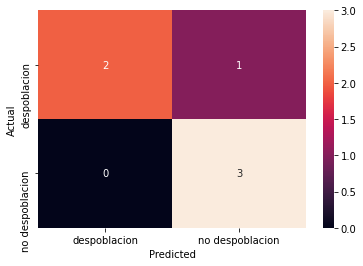

In [25]:
# Mostramos la confusion matrix con mapa de calor


conf_mat = confusion_matrix(y_test, prediction)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=['despoblacion','no despoblacion'], yticklabels=['despoblacion','no despoblacion'])
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [26]:
# Clasificamos textos al momento
texts = ["Los pueblos de la españa vaciada",
         "El capitan tsubasa marca un gol para el equipo de japon",
         "trump deja la casa blanca",
         "beyonce saca un nuevo disco y es exito en asia",
         "el pueblo de mi abuela no tiene gente"]

# Proceso de limpieza del array de textos
spanish_stemmer = SnowballStemmer('spanish')
corpus = []
for texto in texts:
    clean_text = re.sub("[%s]" % re.escape(string.punctuation), " ", texto)
    clean_text= clean_text.lower()
    clean_text = re.sub('\w*\d\w*', ' ', clean_text)
    tokenized = word_tokenize(clean_text)
    for j in range(len(tokenized)):
        tokenized[j]=format(spanish_stemmer.stem(tokenized[j]))
    stemmed = ' '.join(tokenized)
    corpus.append(stemmed)

text_features = cv_tfidf.transform(corpus)
predictions = gd_sr.predict(text_features)
for text, predicted in zip(texts, predictions):
  print('"{}"'.format(text))
  print("  - Predicted as: '{}'".format(predicted))
  print("")


"Los pueblos de la españa vaciada"
  - Predicted as: '0'

"El capitan tsubasa marca un gol para el equipo de japon"
  - Predicted as: '1'

"trump deja la casa blanca"
  - Predicted as: '1'

"beyonce saca un nuevo disco y es exito en asia"
  - Predicted as: '1'

"el pueblo de mi abuela no tiene gente"
  - Predicted as: '0'

